In [0]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

import warnings
warnings.filterwarnings('ignore')

In [30]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis_ID_clean(1).csv to sentiment_analysis_ID_clean(1) (1).csv


In [31]:
df = pd.read_csv('sentiment_analysis_ID_clean(1).csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 8 columns):
Tweet                              1506 non-null object
sentimen                           1506 non-null int64
clean_link                         1506 non-null object
hapus_punc                         1506 non-null object
substitute_slang                   1506 non-null object
stemming                           1506 non-null object
eliminate_stop_with_stemming       1506 non-null object
eliminate_stop_without_stemming    1506 non-null object
dtypes: int64(1), object(7)
memory usage: 105.9+ KB


In [32]:
df['sentimen'].value_counts()

1    757
0    749
Name: sentimen, dtype: int64

In [33]:
df.head()

,Tweet,sentimen,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop_with_stemming,eliminate_stop_without_stemming
0,"rt @napqilla: no 1, 3 ambisinya menguasai raky...",1,"no 1, 3 ambisinya menguasai rakyat, no.2 ambi...",no ambisinya menguasai rakyat no ambisinya ...,no ambisinya menguasai rakyat no ambisinya mel...,no ambisi kuasa rakyat no ambisi layan rakyat ...,no ambisi kuasa rakyat no ambisi layan rakyat ...,no ambisinya menguasai rakyat no ambisinya mel...
1,rt @pandji: nah gue pikir sentimen petahana ok...,1,nah gue pikir sentimen petahana oke di #debat...,nah gue pikir sentimen petahana oke di debatp...,nah saya pikir sentimen petahana oke di debatp...,nah saya pikir sentimen tahana oke di debatpil...,pikir sentimen tahana oke debatpilkadadki mala...,pikir sentimen petahana oke debatpilkadadki se...
2,rt @pandji: urutan pertama best moment #debat2...,1,urutan pertama best moment #debat2pilkadadki ...,urutan pertama best moment debatpilkadadki p...,urutan pertama best moment debatpilkadadki pak...,urut pertama best moment debatpilkadadki pak b...,urut best moment debatpilkadadki basuki misahi...,urutan best moment debatpilkadadki basuki misa...
3,rt @pandji: ini artikel yg menjelaskan ternyat...,1,ini artikel yg menjelaskan ternyata di #debat...,ini artikel yg menjelaskan ternyata di debatp...,ini artikel yang menjelaskan ternyata di debat...,ini artikel yang jelas nyata di debatpilkadadk...,artikel nyata debatpilkadadki respon positif s...,artikel debatpilkadadki respon positif socmed ...
4,rt @mrtampi: agus makin santai.\nahok makin sa...,0,agus makin santai.\nahok makin santun.\nanies...,agus makin santainahok makin santunnanies mak...,agus makin santainahok makin santunnanies maki...,agus makin santainahok makin santunnanies maki...,agus santainahok santunnanies esmosinnimhondeb...,agus santainahok santunnanies esmosinnimhondeb...


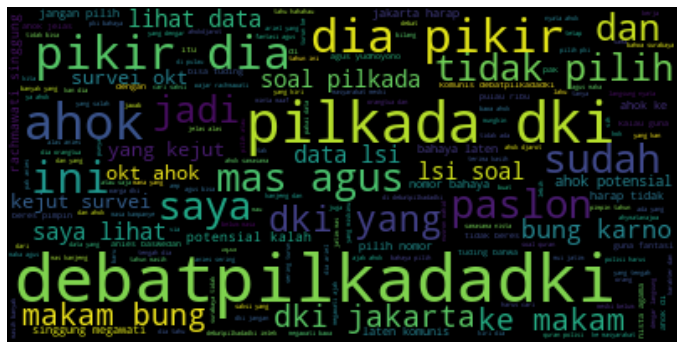

In [34]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (12,8))
text = " ".join(review for review in df['stemming'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

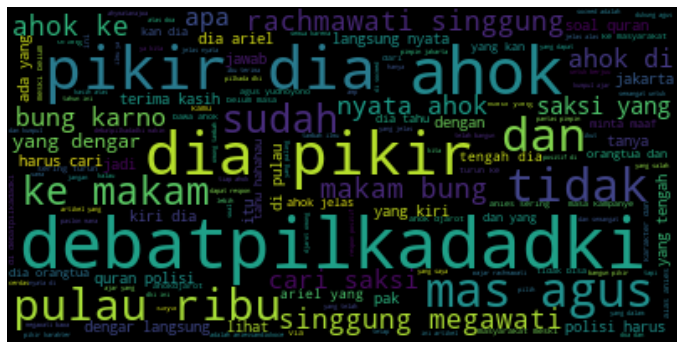

In [35]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (12,8))
text = " ".join(review for review in df[df['sentimen'] == 1]['stemming'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

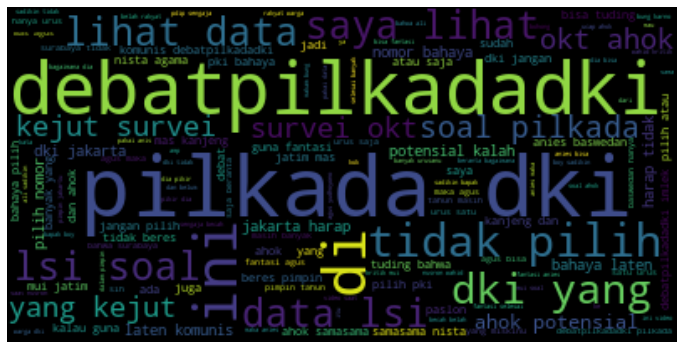

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (12,8))
text = " ".join(review for review in df[df['sentimen'] == 0]['stemming'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        for j in ht:
          hashtags.append(j)

    return hashtags

In [0]:
ht_positive = hashtag_extract(df[df['sentimen'] == 1]['Tweet'])
ht_negative = hashtag_extract(df[df['sentimen'] == 0]['Tweet'])
# ht_positive

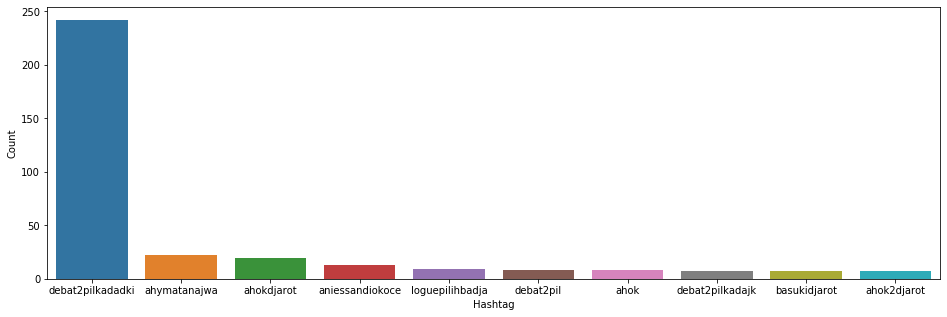

In [39]:
a = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

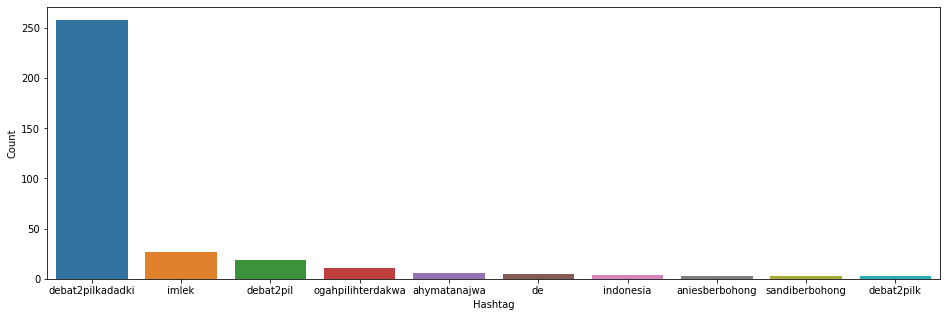

In [40]:
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [0]:
def word_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = ht = re.findall(r"(\w+)", i)
        for j in ht:
          hashtags.append(j)

    return hashtags

In [0]:
word_positive = word_extract(df[df['sentimen'] == 1]['eliminate_stop_with_stemming'])
word_negative = word_extract(df[df['sentimen'] == 0]['eliminate_stop_with_stemming'])

### skip

In [0]:
def bigram_extract(x):
    hashtags = {}
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"(\w+)", i)
        ht = nltk.bigram(ht)
        ht = nltk.FreqDist(ht)
        hashtag += ht

    return hashtags

In [18]:
c = {}
text = 'aku ingin begini aku ingin begitu'
tes = 'ingin ini ingin itu banyak sekali ingin begitu'
a = nltk.bigrams(text.split())
b = nltk.bigrams(tes.split())
a = nltk.FreqDist(a)
b = nltk.FreqDist(b)
c = a+b
d = a + b
c = c+d
c += a
c

FreqDist({('aku', 'ingin'): 6,
          ('banyak', 'sekali'): 2,
          ('begini', 'aku'): 3,
          ('ingin', 'begini'): 3,
          ('ingin', 'begitu'): 5,
          ('ingin', 'ini'): 2,
          ('ingin', 'itu'): 2,
          ('ini', 'ingin'): 2,
          ('itu', 'banyak'): 2,
          ('sekali', 'ingin'): 2})

### start again

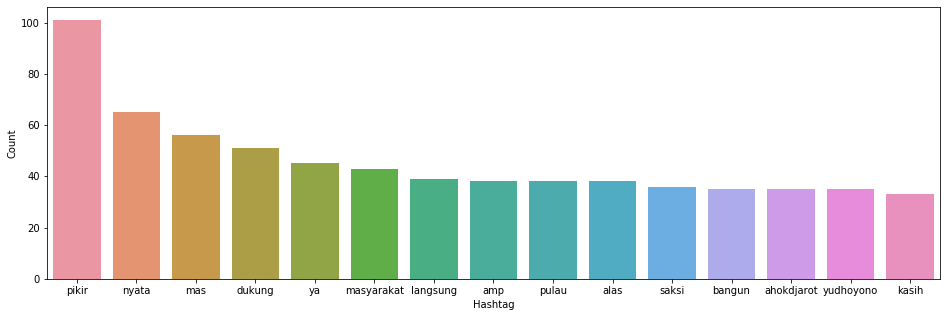

In [42]:
a = nltk.FreqDist(word_positive)
d_positive = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d_view_positive = d_positive.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d_view_positive, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

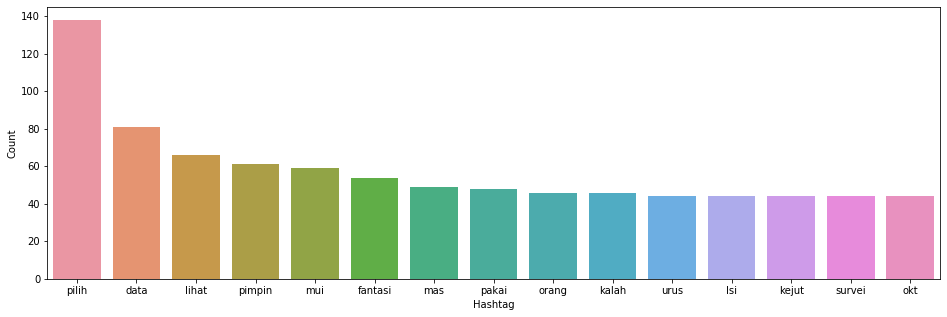

In [43]:
a = nltk.FreqDist(word_negative)
d_negative = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d_view_negative = d_negative.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d_view_negative, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

This dataset is tweet from pilkada dki. Based on the graph above, all words related to pilkada is majority in positive and negative sentiment. Lets erase all name and words thats related with pilkada dki to reduce noise and bias

In [0]:
noise_words = list(set(list(d_positive[d_positive['Count'] < 2]['Hashtag'].values) + list(d_negative[d_negative['Count'] < 2]['Hashtag'].values)))
len(noise_words)
high_words = list(d_view_positive['Hashtag'].values) + list(d_view_negative['Hashtag'].values)
multiple = []
for key, val in dict(nltk.FreqDist(high_words)).items():
  # print (key)
  if val > 1:
    noise_words.append(key)
    

In [0]:
def remove_words(text):
    global noise_words
    pilkada_words = 'ahok debatpilkadadki dki anies pilkada agus jakarta rachmawati megawati karno'.split()
    noise_words = pilkada_words + noise_words
    text = text.split()
    text = [word for word in text if word not in noise_words]
    return ' '.join(text)

In [0]:
df['eliminate_noise_stem'] = df['eliminate_stop_with_stemming'].apply(remove_words)
df['eliminate_noise_wo_stem'] = df['eliminate_stop_without_stemming'].apply(remove_words)

In [0]:
# pilkada_words = 'ahok debatpilkadadki dki anies pilkada agus jakarta'.split()

In [0]:
# def remove_pilkada(text):
#     pilkada_words = 'ahok debatpilkadadki dki anies pilkada agus jakarta paslon rachmawati mui lihat pilih karno megawati lsi'.split()
#     text = text.split()
#     text = [word for word in text if word not in pilkada_words]
#     return ' '.join(text)

In [0]:
# df['remove_pilkada_with_stemming'] = df['eliminate_stop_with_stemming'].apply(remove_pilkada)
# df['remove_pilkada_without_stemming'] = df['eliminate_stop_without_stemming'].apply(remove_pilkada)

Lets see the wordcloud and word count once again.

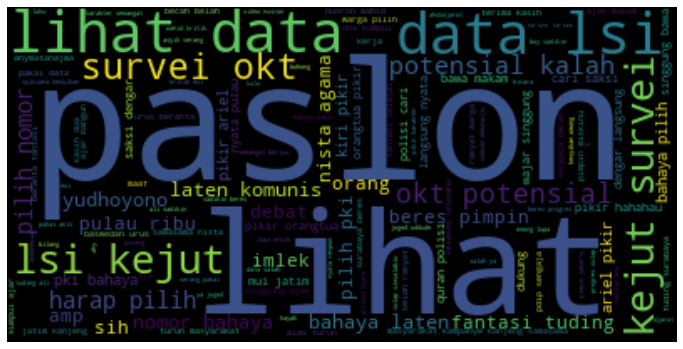

In [47]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize = (12,8))
text = " ".join(review for review in df['eliminate_noise_stem'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

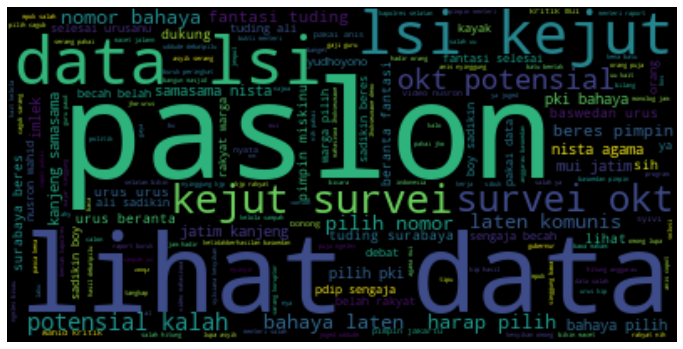

In [48]:
plt.figure(figsize = (12,8))
text = " ".join(review for review in df[df['sentimen'] == 0]['eliminate_noise_stem'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

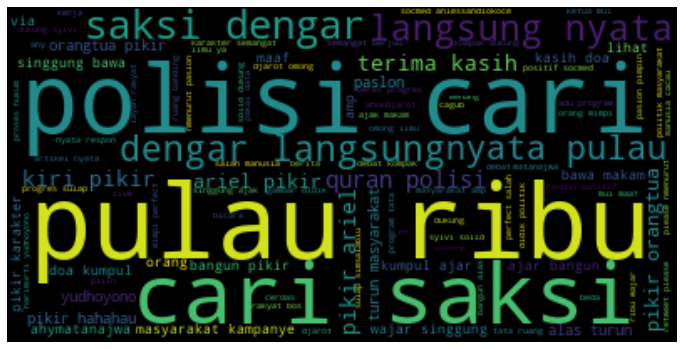

In [49]:
plt.figure(figsize = (12,8))
text = " ".join(review for review in df[df['sentimen'] == 1]['eliminate_noise_stem'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
word_positive = word_extract(df[df['sentimen'] == 1]['eliminate_noise_stem'])
word_negative = word_extract(df[df['sentimen'] == 0]['eliminate_noise_stem'])

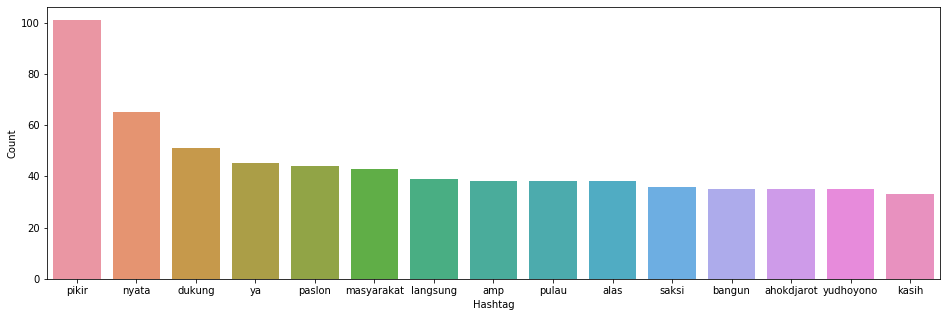

In [51]:
a = nltk.FreqDist(word_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

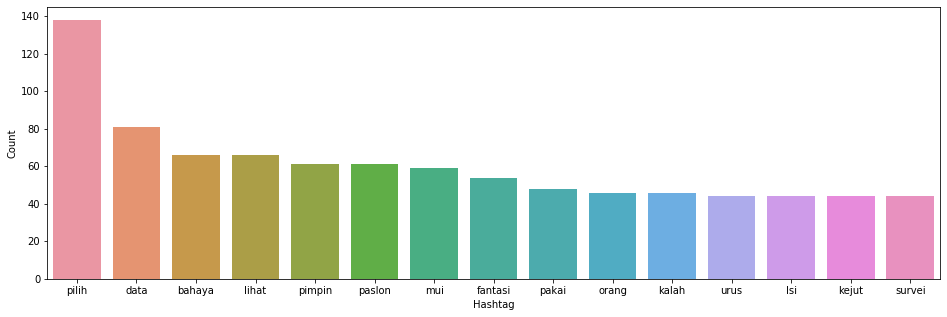

In [52]:
a = nltk.FreqDist(word_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Remove text with low frequency

In [62]:
tes = d.copy()
tes

,Hashtag,Count
3,pilih,138
23,data,81
5,bahaya,66
107,lihat,66
57,pimpin,61
69,paslon,61
563,mui,59
53,fantasi,54
22,pakai,48
36,orang,46


In [0]:
# tes.drop('pilih', axis = 0, inplace = True)
# tes

# New Section

## ML Model

In [0]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD

In [0]:
def run_cv_binary(splits, X, Y, pipeline):
    
    kf = KFold(n_splits = splits, shuffle = True)
    res = {}
    accuracy = []
    precision_all = []
    recall_all = []
    # logloss = []

    for train, test in kf.split(X, Y):
        lr_fit = pipeline.fit(X.iloc[train], Y.iloc[train])
        prediction = lr_fit.predict(X.iloc[test])
        scores = accuracy_score(Y.iloc[test], prediction)
        precision = precision_score(Y.iloc[test], prediction, average = None)
        # print(precision)
        # precision = precision_score(Y.iloc[test], prediction, average = None)
        recall = recall_score(Y.iloc[test], prediction, average = None)
        precision_all.append(np.array(precision)*100)
        recall_all.append(np.array(recall)*100)
        # print(classification_report(Y.iloc[test], prediction))

        accuracy.append(scores * 100)
        
    precision_all = np.array(precision_all)
    recall_all = np.array(recall_all)
    
    res['acc_mean'] = np.mean(accuracy)

    res['acc_std'] = np.std(accuracy)
   
    res['precision_negative_mean'] = np.mean(precision_all[:,0])

    res['precision_negative_std'] = np.std(precision_all[:,0])

    res['precision_positive_mean'] = np.mean(precision_all[:,1])

    res['precision_positive_std'] = np.std(precision_all[:,1])
    
    res['recall_negative_mean'] = np.mean(recall_all[:,0])

    res['recall_negative_std'] = np.std(recall_all[:,0])

    res['recall_positive_mean'] = np.mean(recall_all[:,1])

    res['recall_positive_std'] = np.std(recall_all[:,1])

    # res['recall_positive_mean'] = np.mean(recall_all[:,2])

    return res

In [55]:
list_column = list(df.columns)
list_column.remove('sentimen')
# list_column

pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,1))),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB())])

def try_various_columns(list_column, pipeline):
    res = {}
    for i in list_column:
        res[i] = run_cv_binary(5,df[i], df['sentimen'], pipeline)
#         print (i, 'done')
    return res

res = try_various_columns(list_column, pipeline)
pd.DataFrame(res)

,Tweet,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop_with_stemming,eliminate_stop_without_stemming,eliminate_noise_stem,eliminate_noise_wo_stem
acc_mean,78.485622,80.345427,80.015181,79.481200,80.478757,80.146751,80.012761,80.876548,79.614090
acc_std,2.318860,1.444428,2.052396,2.633984,2.647487,1.307972,2.328781,1.082423,2.434722
precision_negative_mean,83.046421,84.557159,83.638256,83.135863,84.025528,81.503259,80.882018,82.982412,81.668038
precision_negative_std,4.095255,2.165608,2.572216,4.733254,4.403980,2.897948,1.735661,1.042687,4.009008
precision_positive_mean,75.096635,77.072150,77.138199,76.596591,77.705554,78.796358,79.176449,79.012745,78.277547
precision_positive_std,2.634164,2.205911,2.015712,2.072940,1.782249,1.693720,3.259287,2.245555,5.089026
recall_negative_mean,71.585202,73.992789,74.040315,73.626333,74.942954,77.512524,78.219397,77.475948,76.701747
recall_negative_std,0.934584,1.771772,4.826905,2.716312,3.325008,1.510837,3.932923,1.037119,6.030936
recall_positive_mean,85.300176,86.679033,85.696566,85.281424,85.930711,82.726768,81.714745,84.252706,82.765705
recall_positive_std,4.463705,1.469470,2.341594,3.653635,3.661974,1.541387,1.761973,1.281371,4.819460


In [56]:
list_column = list(df.columns)
list_column.remove('sentimen')
# list_column

pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,2))),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB())])

def try_various_columns(list_column, pipeline):
    res = {}
    for i in list_column:
        res[i] = run_cv_binary(5,df[i], df['sentimen'], pipeline)
#         print (i, 'done')
    return res

res = try_various_columns(list_column, pipeline)
pd.DataFrame(res)

,Tweet,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop_with_stemming,eliminate_stop_without_stemming,eliminate_noise_stem,eliminate_noise_wo_stem
acc_mean,79.615850,79.812325,79.418715,80.346307,81.805461,79.748300,78.950958,80.742558,80.612088
acc_std,1.552797,2.077740,3.755782,1.800171,1.570891,0.768648,1.141056,1.626073,2.533917
precision_negative_mean,83.068714,83.983591,83.142997,84.241525,84.988671,81.728399,80.648300,82.493737,81.688404
precision_negative_std,1.293942,3.150056,4.474362,3.154908,1.945467,3.996233,1.047817,3.435248,4.617511
precision_positive_mean,76.917697,76.785822,76.532062,77.381916,79.286799,78.275476,77.431353,79.308073,79.650235
precision_positive_std,2.682380,2.500776,4.019904,1.734641,3.449176,2.396301,1.618319,2.367992,3.455321
recall_negative_mean,74.100691,73.565948,73.595414,74.498506,77.119956,76.679264,75.751199,77.999191,78.878418
recall_negative_std,3.590403,4.130488,4.453752,2.533221,3.833847,3.323418,2.815873,2.399232,2.300101
recall_positive_mean,85.066160,86.016412,85.205599,86.165925,86.576386,82.919993,81.976641,83.508320,82.542204
recall_positive_std,1.216206,3.294435,4.190057,2.954131,1.474178,4.122407,1.680650,3.583938,4.139304


### skip

[[0.55982275 0.54357459 0.54800591 0.56573117 0.61004431 0.59822747
  0.59379616 0.59675037 0.59527326 0.59379616]
 [0.56264775 0.55437352 0.4893617  0.55319149 0.60283688 0.55319149
  0.4964539  0.51536643 0.4964539  0.4964539 ]
 [0.57775591 0.55216535 0.55610236 0.54330709 0.56102362 0.57283465
  0.55905512 0.55019685 0.55019685 0.55019685]
 [0.55780591 0.55527426 0.54683544 0.49198312 0.55105485 0.56118143
  0.52489451 0.54683544 0.56793249 0.56793249]
 [0.53579336 0.53431734 0.52767528 0.48634686 0.55129151 0.54095941
  0.49446494 0.51512915 0.53653137 0.53874539]]
[0.58050222 0.5320331  0.55728346 0.547173   0.52612546]
[ 677  846 1016 1185 1355]


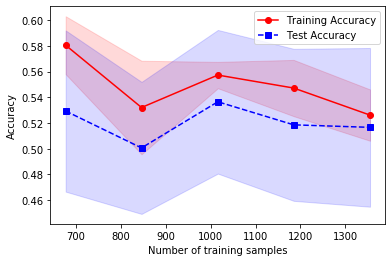

In [40]:
pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,2), min_df = 0.05)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                       X=df['eliminate_noise_stem'],
                                                       y=df['sentimen'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[[0.94239291 0.93057607 0.93205318 0.94830133 0.9394387  0.93648449
  0.93353028 0.9379616  0.93500739 0.93648449]
 [0.93617021 0.92907801 0.92907801 0.93735225 0.93144208 0.93262411
  0.93380615 0.93498818 0.93498818 0.93262411]
 [0.93307087 0.92125984 0.9261811  0.92814961 0.92519685 0.9261811
  0.9261811  0.92913386 0.92913386 0.92913386]
 [0.93080169 0.92658228 0.92742616 0.93164557 0.9257384  0.92827004
  0.93080169 0.92911392 0.92405063 0.92405063]
 [0.93505535 0.92693727 0.92841328 0.93136531 0.92693727 0.92915129
  0.92915129 0.9298893  0.92693727 0.92693727]]
[0.93722304 0.93321513 0.9273622  0.9278481  0.92907749]
[ 677  846 1016 1185 1355]


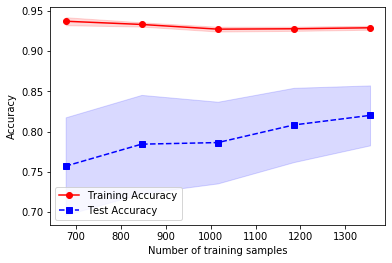

In [41]:
pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,2))),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                       X=df['eliminate_noise_stem'],
                                                       y=df['sentimen'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### start again

In [0]:
import datetime

def various_pipeline():
  list_column = list(df.columns)
  list_column.remove('sentimen')
  classifier_list = {'nb' : MultinomialNB(),
                     'logreg' : LogisticRegression(),
                     'svm' : LinearSVC(),
                     'rfc' : RandomForestClassifier(),
                     'knn' : KNeighborsClassifier(),
                     'gradient' : GradientBoostingClassifier(),
                     'adaboost' : AdaBoostClassifier(),
                     'xgb' : XGBClassifier()
                     }
  result = []
  for i in list_column:
    for key, val in classifier_list.items():
      for ngram in range(1,4,1):
        #all
        temp = Pipeline([('bow', CountVectorizer(ngram_range = (1,ngram))),  # strings to token integer counts
                            ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                            ('sampling_1',SMOTE()),
                            ('classifier', val)])
        start = datetime.datetime.now()
        temp_res = run_cv_binary(5,df[i], df['sentimen'], temp)
        # temp_res = {'tes' : 'coba'}
        end = datetime.datetime.now()
        time = end-start
        temp_res['ngram'] = ngram
        temp_res['classifier'] = key
        temp_res['time'] = time.seconds
        temp_res['smote'] = True
        temp_res['tfidf'] = True
        temp_res['column'] = i
        result.append(temp_res)

        #no_smote
        temp = Pipeline([('bow', CountVectorizer(ngram_range = (1,ngram))),  # strings to token integer counts
                            ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                            # ('sampling_1',SMOTE()),
                            ('classifier', val)])
        start = datetime.datetime.now()
        temp_res = run_cv_binary(5,df[i], df['sentimen'], temp)
        # temp_res = {'tes' : 'coba'}
        end = datetime.datetime.now()
        time = end-start
        temp_res['ngram'] = ngram
        temp_res['classifier'] = key
        temp_res['time'] = time.seconds
        temp_res['smote'] = False
        temp_res['tfidf'] = True
        temp_res['column'] = i
        result.append(temp_res)

        #no_tfidf
        temp = Pipeline([('bow', CountVectorizer(ngram_range = (1,ngram))),  # strings to token integer counts
                            # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                            ('sampling_1',SMOTE()),
                            ('classifier', val)])
        start = datetime.datetime.now()
        temp_res = run_cv_binary(5,df[i], df['sentimen'], temp)
        # temp_res = {'tes' : 'coba'}
        end = datetime.datetime.now()
        time = end-start
        temp_res['ngram'] = ngram
        temp_res['classifier'] = key
        temp_res['time'] = time.seconds
        temp_res['smote'] = True
        temp_res['tfidf'] = False
        temp_res['column'] = i
        result.append(temp_res)

        #no_tfidf no_smote
        temp = Pipeline([('bow', CountVectorizer(ngram_range = (1,ngram))),  # strings to token integer counts
                            # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                            # ('sampling_1',SMOTE()),
                            ('classifier', val)])
        start = datetime.datetime.now()
        temp_res = run_cv_binary(5,df[i], df['sentimen'], temp)
        # temp_res = {'tes' : 'coba'}
        end = datetime.datetime.now()
        time = end-start
        temp_res['ngram'] = ngram
        temp_res['classifier'] = key
        temp_res['time'] = time.seconds
        temp_res['smote'] = False
        temp_res['tfidf'] = False
        temp_res['column'] = i
        result.append(temp_res)

  return result
      

In [0]:
res = various_pipeline()

# pd.DataFrame(res)

In [0]:
classifier_list = {#'nb' : MultinomialNB(),
                     'logreg' : LogisticRegression(),
                     'svm' : LinearSVC(),
                     'rfc' : RandomForestClassifier(),
                     'knn' : KNeighborsClassifier(),
                     'gradient' : GradientBoostingClassifier(),
                     'adaboost' : AdaBoostClassifier(),
                     'xgb' : XGBClassifier()
                     }
for key, val in classifier_list.items():
  temp = Pipeline([('bow', CountVectorizer(ngram_range = (1,1))),  # strings to token integer counts
                            ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                            ('sampling_1',SMOTE()),
                            ('svd', TruncatedSVD(n_components = 100)),
                            ('classifier', val)])
  
  temp.fit(df['stemming'], df['sentimen'])
  print (key)

In [0]:
# res = various_pipeline()

# pd.DataFrame(res)

from google.colab import files
uploaded = files.upload()


In [0]:
result = pd.read_csv('variasi_smote_tfidf_model(2).csv', index_col = 0)

result.head()


### Switch to model comparation visualization notebook

In [0]:
result = pd.DataFrame(res)

In [0]:
result.sort_values(by = 'acc_mean', ascending = False).head(10)

In [0]:
plt.scatter(result['acc_mean'], result['acc_std'])

In [0]:
result[(result['acc_std']<3)&(result['precision_positive_std']<3)&(result['precision_negative_std']<3)].sort_values(by = 'acc_mean', ascending = False)

In [0]:
result['delta_precision'] = abs(result['precision_negative_mean'] - result['precision_positive_mean'])
result['delta_recall'] = abs(result['recall_negative_mean'] - result['recall_positive_mean'])

In [0]:
plt.scatter(result['delta_precision'], result['delta_recall'])

The criteria that we use:
- Since it will be used on a stream data, the model should be fast (time == 0 second)
- the model need to be stable (low std)
- there is no great difference in recall and precision (delta < 4)
- high accuracy (acc_mean > 80)

In [0]:
result[(result['delta_precision']<4) & (result['delta_recall']<4) 
& (result['acc_std'] < 3) 
& (result['precision_negative_std'] < 4) & (result['precision_positive_std'] < 4)
& (result['recall_negative_std'] < 4) & (result['recall_positive_std'] < 4)].sort_values(by = 'acc_mean', ascending = False) #& (result['time'] <= 1)]

In [0]:
result.to_csv('variasi_smote_tfidf_svd_model.csv')

In [0]:
from google.colab import files
files.download('variasi_smote_tfidf_svd_model.csv')

In [0]:
group_res = result.groupby('classifier')
group_res.median()

In [0]:
group_res = result.groupby('column')
group_res.median()

In [0]:
sns.boxplot(x = 'classifier', y = 'acc_mean', data = result)

In [0]:
sns.boxplot(x = 'classifier', y = 'acc_std', data = result)

In [0]:
sns.boxplot(x = 'classifier', y = 'delta_precision', data = result)

In [0]:
sns.boxplot(x = 'classifier', y = 'delta_recall', data = result)

In [0]:
sns.boxplot(x = 'column', y = 'delta_recall', data = result)
plt.xticks(rotation = 90)

In [0]:
classifier = result['classifier'].unique()
classifier
# plt.figure(figsize = (30,10))
f, axes = plt.subplots(1, len(classifier), figsize = (200,10))
for i in range(len(classifier)):
  sns.boxplot(x = 'column', y = 'acc_mean', data = result[result['classifier'] == classifier[i]], ax = axes[i])
  axes[i].set_title(classifier[i])
  # plt.set_xticks(rotation=90)
  # axes[i].set_xticks(rotation = 90)
  # sns.boxplot(x = 'column', y = 'acc_mean', data = result[result['classifier'] == 'svm'], ax = axes[1])

We can conclude that the best model is using linearsvc model, 1 gram is enough, using smote and without tf-idf. The column used are the ones that eliminate stop words with stemming.

In [0]:
f, axes = plt.subplots(1,2)

sns.boxplot(x = 'column', y = 'acc_mean', data = result[result['classifier'] == 'svm'], ax = axes[0])

sns.boxplot(x = 'column', y = 'acc_mean', data = result[result['classifier'] == 'rfc'], ax = axes[1])

With groupby, we can see that svm or LinearSVC model is the most stable with highest accuracy.

In [0]:
pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,1))),  # strings to token integer counts
                        # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                       X=df['eliminate_stop_with_stemming'],
                                                       y=df['sentimen'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the result above, can be determined that the model is stable and can be used for analysis

In [0]:
import datetime
import time 
start = datetime.datetime.now()
time.sleep(2)
end = datetime.datetime.now()

In [0]:
time = end-start
time.seconds

## Export Model

[[0.96602659 0.95864106 0.95568685 0.96750369 0.96307238 0.96159527
  0.96159527 0.96159527 0.96159527 0.96159527]
 [0.96335697 0.95508274 0.95626478 0.96217494 0.95862884 0.95981087
  0.95862884 0.95862884 0.95862884 0.95744681]
 [0.95570866 0.9488189  0.95177165 0.95472441 0.95177165 0.95275591
  0.95374016 0.95669291 0.95669291 0.95669291]
 [0.95611814 0.95189873 0.9535865  0.95611814 0.9535865  0.9535865
  0.95611814 0.95527426 0.95105485 0.95105485]
 [0.95645756 0.95202952 0.95498155 0.95645756 0.95424354 0.95424354
  0.95571956 0.95571956 0.95276753 0.95276753]]
[0.96189069 0.95886525 0.95393701 0.95383966 0.95453875]
[ 677  846 1016 1185 1355]


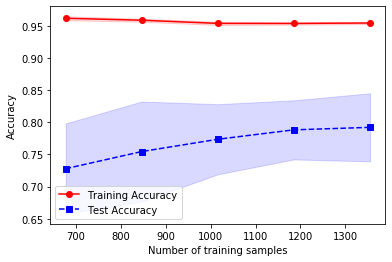

In [58]:
pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,2))),  # strings to token integer counts
                        # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline,
                                                       X=df['eliminate_stop_with_stemming'],
                                                       y=df['sentimen'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
# pipeline = Pipeline([('bow', CountVectorizer(ngram_range = (1,2))),  # strings to token integer counts
#                         # ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#                         ('sampling_1',SMOTE()),
#                         ('classifier', LinearSVC())])

pipeline.fit(df['eliminate_stop_with_stemming'],df['sentimen'])

import pickle
filename = 'linearsvc_binary.sav';
pickle.dump(pipeline, open(filename, 'wb'))

from google.colab import files
files.download('linearsvc_binary.sav')